In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

Defination of Sigmoid

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))        

In [3]:
def logreg(X,Y):
    theta = np.random.rand(np.size(X,1))-0.5
    print (theta)
    learnrate = 0.0015355
    maxiter = 100000
    for itr in range(0, maxiter):
        gradient = np.matmul(np.transpose(X), Y-sigmoid(np.matmul(X,theta)))
        theta += learnrate * gradient
    return (theta)

I have not seperated the number of admits in 50:50 ratio as the dataset is such that number of admits accepted is less than number of admits rejected.

In [4]:
data = pd.read_csv("Admit.csv")
data['Ones'] = 1
print (data)

     admit  gre   gpa  rank  Ones
0        0  380  3.61     3     1
1        1  660  3.67     3     1
2        1  800  4.00     1     1
3        1  640  3.19     4     1
4        0  520  2.93     4     1
5        1  760  3.00     2     1
6        1  560  2.98     1     1
7        0  400  3.08     2     1
8        1  540  3.39     3     1
9        0  700  3.92     2     1
10       0  800  4.00     4     1
11       0  440  3.22     1     1
12       1  760  4.00     1     1
13       0  700  3.08     2     1
14       1  700  4.00     1     1
15       0  480  3.44     3     1
16       0  780  3.87     4     1
17       0  360  2.56     3     1
18       0  800  3.75     2     1
19       1  540  3.81     1     1
20       0  500  3.17     3     1
21       1  660  3.63     2     1
22       0  600  2.82     4     1
23       0  680  3.19     4     1
24       1  760  3.35     2     1
25       1  800  3.66     1     1
26       1  620  3.61     1     1
27       1  520  3.74     4     1
28       1  78

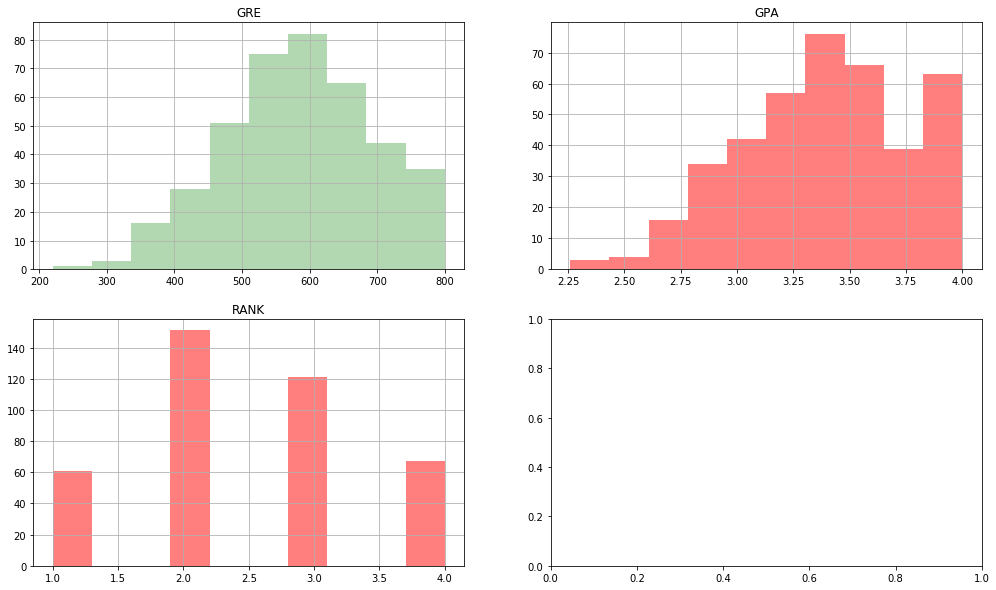

In [5]:
fig, ax_arr = plt.subplots(nrows=2, ncols=2, # let their scales be different
                       sharex=False, sharey=False)

fig.set_figwidth(17)
fig.set_figheight(10)

ax_arr[0][0].set_title('GRE')
freq_arr, binarr, _ = ax_arr[0][0].hist(data['gre'], facecolor='g', alpha=0.3)
ax_arr[0][0].grid()

ax_arr[0][1].set_title('GPA')
freq_arr, binarr, _ = ax_arr[0][1].hist(data['gpa'], facecolor='r', alpha=0.5)
ax_arr[0][1].grid()

ax_arr[1][0].set_title('RANK')
freq_arr, binarr, _ = ax_arr[1][0].hist(data['rank'], facecolor='r', alpha=0.5)
ax_arr[1][0].grid()

In [6]:
Mat = np.array(data[['admit','Ones','gre','gpa','rank']])
XMat = Mat[:,1:np.size(Mat,1)]
max = np.max(XMat, axis=0)
XMat = XMat/max
YMat = Mat[:,0]
print (XMat)
print (YMat)

[[1.     0.475  0.9025 0.75  ]
 [1.     0.825  0.9175 0.75  ]
 [1.     1.     1.     0.25  ]
 ...
 [1.     0.575  0.6575 0.5   ]
 [1.     0.875  0.9125 0.5   ]
 [1.     0.75   0.9725 0.75  ]]
[0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 0

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(XMat, YMat, test_size=0.2)
#print (X_train)
#print (Y_train)
#print (X_test)
#print (Y_test)

In [8]:
theta = logreg(X_train, Y_train)

[-0.04136569 -0.13272474  0.08318897  0.17808821]


In [9]:
print (theta)

[-3.25264099  2.48401477  2.46149513 -2.52300366]


In [10]:
res = np.round( sigmoid( np.matmul(X_test, theta) ) )
print (res)
print (Y_test)

[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 0. 0.]


###### Error Function

In [11]:
error = (res - Y_test)**2
print (error)

[0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 0. 0.]


In [12]:
no_of_matches = np.sum( res == Y_test)
accuracy = no_of_matches/len(Y_test)
#Accuracy Calculation
print (accuracy)

0.6375


In [13]:
#print (np.where(res>0.5, plt.plot(XMat[res,0], XMat[res,1],'b+'), plt.plot(XMat[res,0], XMat[res,1], 'r+')) )

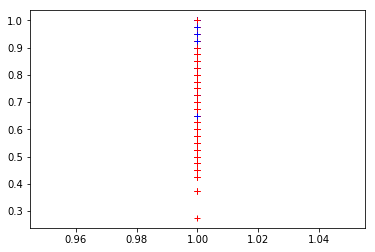

In [14]:
res_graph = sigmoid(np.matmul(XMat, theta))
for rowind in range(0, len(XMat)):
    if res_graph[rowind] > 0.5:
        plt.plot(XMat[rowind,0], XMat[rowind,1], 'b+')
    else:
        plt.plot(XMat[rowind,0], XMat[rowind,1], 'r+')

In [15]:
X_test[:,1]

array([0.775, 0.475, 0.875, 0.65 , 0.675, 0.75 , 0.625, 0.975, 0.875,
       1.   , 1.   , 0.65 , 0.8  , 0.5  , 0.775, 0.725, 0.925, 0.775,
       0.6  , 0.85 , 0.675, 0.825, 0.9  , 0.85 , 0.9  , 0.825, 0.625,
       0.925, 0.725, 0.675, 0.825, 0.65 , 0.7  , 0.85 , 0.775, 0.925,
       0.675, 0.75 , 0.55 , 0.875, 0.425, 1.   , 0.85 , 0.625, 0.45 ,
       1.   , 0.55 , 0.65 , 0.65 , 0.375, 0.725, 0.65 , 0.725, 0.525,
       0.7  , 0.625, 0.6  , 0.575, 1.   , 0.875, 1.   , 0.625, 0.75 ,
       0.8  , 0.7  , 0.775, 0.675, 0.7  , 0.85 , 0.65 , 0.8  , 0.75 ,
       0.825, 0.65 , 0.825, 0.675, 0.775, 0.775, 0.55 , 0.625])

In [16]:
X_test = X_test*max

Text(0, 0.5, 'ApplicationNumber')

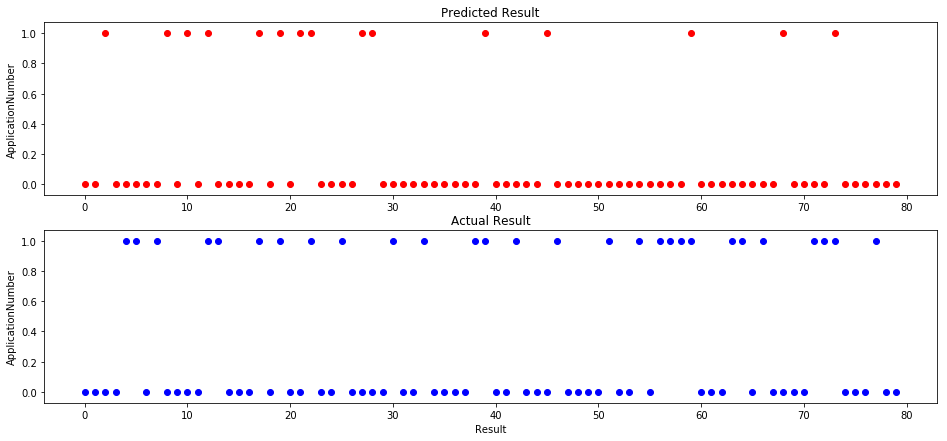

In [17]:
fig, arr = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=True)

fig.set_figwidth(16)
fig.set_figheight(7)

arr[0].scatter (np.arange(len(res)),res,c='r' )
arr[0].set_title('Predicted Result')
arr[0].set_ylabel('ApplicationNumber')

arr[1].scatter (np.arange(len(Y_test)),Y_test, c='b' )
arr[1].set_title('Actual Result')
arr[1].set_xlabel('Result')
arr[1].set_ylabel('ApplicationNumber')